# Trabalho Final - Cálculo Numérico (SME0104)
#### Thales Sena de Queiroz - 14608873
#### Guilherme Pascoale Godoy - 

### 1 Sistemas Lineares

**Sistemas lineares** são um conjunto de equações lineares, frequentemente representados na forma matricial $Ax = b$, e constituem um dos problemas mais fundamentais e recorrentes na ciência e engenharia. Resolver um sistema linear significa encontrar o vetor de variáveis $x$ que satisfaz simultaneamente todas as equações. Para sistemas grandes e complexos, métodos numéricos eficientes são essenciais.

A **Decomposição LU** é uma técnica poderosa para resolver sistemas lineares, baseada no método de Eliminação de Gauss.  A ideia é fatorar a matriz de coeficientes $A$ em um produto de duas matrizes: uma triangular inferior $L$ e uma triangular superior $U$, de modo que $A = LU$.  Essa fatoração é extremamente útil, pois transforma o problema original $Ax=b$ em dois sistemas triangulares muito mais simples de resolver, pois $Ax=b$ vira $LUx=b$ colocamos $Ux=y$ então resolvemos $Ly=b$ com substituições progressivas para então resolver $Ux=y$ com substituições regressivas para descobrir os valores de $x$.

### Exemplo: Substituições Progressivas e Regressivas

Após obter a decomposição $A=LU$, o sistema original $Ax=b$ é resolvido em duas etapas:

1.  **Substituição Progressiva**: Resolve-se o sistema triangular inferior $Ly=b$.
2.  **Substituição Regressiva**: Resolve-se o sistema triangular superior $Ux=y$.

---

#### 1. Substituição Progressiva 

Resolvemos o sistema $Ly=b$ para encontrar o vetor intermediário $y$. A solução é encontrada progressivamente, da primeira variável ($y_1$) até a última.

**Exemplo:** Dado o sistema $Ly=b$:

$$
\begin{pmatrix}
  1 & 0 & 0 \\
  2 & 1 & 0 \\
  -1 & 3 & 1
\end{pmatrix}
\begin{pmatrix}
  y_1 \\
  y_2 \\
  y_3
\end{pmatrix}
=
\begin{pmatrix}
  5 \\
  12 \\
  4
\end{pmatrix}
$$

* **Passo 1 (Linha 1):**
    $1 \cdot y_1 = 5 \implies y_1 = 5$

* **Passo 2 (Linha 2):**
    $2 \cdot y_1 + 1 \cdot y_2 = 12 \implies 2(5) + y_2 = 12 \implies y_2 = 2$

* **Passo 3 (Linha 3):**
    $-1 \cdot y_1 + 3 \cdot y_2 + 1 \cdot y_3 = 4 \implies -1(5) + 3(2) + y_3 = 4 \implies y_3 = 3$

O vetor solução é $y = [5, 2, 3]^T$.

---

#### 2. Substituição Regressiva 

Com o vetor $y$ calculado, resolvemos o sistema $Ux=y$ para encontrar a solução final $x$. A solução é encontrada de forma regressiva, da última variável ($x_3$) até a primeira.

**Exemplo:** Dado o sistema $Ux=y$ (usando o $y$ que acabamos de encontrar):

$$
\begin{pmatrix}
  4 & 2 & 1 \\
  0 & -2 & 1 \\
  0 & 0 & 3
\end{pmatrix}
\begin{pmatrix}
  x_1 \\
  x_2 \\
  x_3
\end{pmatrix}
=
\begin{pmatrix}
  15 \\
  -1 \\
  3
\end{pmatrix}
$$

* **Passo 1 (Linha 3):**
    $3 \cdot x_3 = 3 \implies x_3 = 1$

* **Passo 2 (Linha 2):**
    $-2 \cdot x_2 + 1 \cdot x_3 = -1 \implies -2x_2 + 1(1) = -1 \implies x_2 = 1$

* **Passo 3 (Linha 1):**
    $4 \cdot x_1 + 2 \cdot x_2 + 1 \cdot x_3 = 15 \implies 4x_1 + 2(1) + 1(1) = 15 \implies x_1 = 3$

A solução final do sistema original é $x = [3, 1, 1]^T$.

***

Em muitos problemas práticos, a matriz $A$ possui uma estrutura especial conhecida como **matriz banda**,
$$
A = \begin{pmatrix}
  a_{11} & a_{12} & 0 & 0 & 0 & 0 \\
  a_{21} & a_{22} & a_{23} & 0 & 0 & 0 \\
  0 & a_{32} & a_{33} & a_{34} & 0 & 0 \\
  0 & 0 & a_{43} & a_{44} & a_{45} & 0 \\
  0 & 0 & 0 & a_{54} & a_{55} & a_{56} \\
  0 & 0 & 0 & 0 & a_{65} & a_{66}
\end{pmatrix}
$$
na qual os elementos não nulos se concentram em uma faixa ao redor da diagonal principal. Para esses casos, algoritmos genéricos de decomposição LU, como o apresentado em `func1`, podem ser ineficientes. Por isso, desenvolvem-se métodos otimizados, como o implementado em `func2` , que exploram a esparsidade da matriz para evitar cálculos com os zeros fora da banda, resultando em um ganho de performance significativo.

In [2]:
import numpy as np
import time

# Função 1: Decomposição LU Padrão
def func1(A):
  # Calcula a decomposição LU de uma matriz A.
  
  n = A.shape[0]
  U = A.copy()
  L = np.eye(n)
  for j in range(n - 1):
    for i in range(j + 1, n):
      L[i, j] = U[i, j] / U[j, j]
      U[i, j : n] = U[i, j : n] - L[i, j] * U[j, j : n]
  return (L, U)

A = np.array([[2.0, 1.0, 2.0],[4.0, 3.0, 3.0],[6.0,5.0,-1.0]])
x = func1(A)
print(x)

(array([[1., 0., 0.],
       [2., 1., 0.],
       [3., 2., 1.]]), array([[ 2.,  1.,  2.],
       [ 0.,  1., -1.],
       [ 0.,  0., -5.]]))


In [ ]:
def func2 ( A, p ) :
  n = A.shape [ 0 ]
  U = A.copy()
  L = np.eye ( n )
  for j in range ( n - 1 ) :
    v = min ( n , j + p + 1 ) # Redefine os limites do laço, para ficar dentro da faixa de banda.
    for i in range ( j + 1 , v ) :
      L [ i , j ] = U[ i , j ] / U[ j , j ]
      U[ i , j : v ] = U[ i , j : v ] - L [ i , j ] * U[ j , j : v ]
  return ( L , U )

n = 4
p = 2
A = np.zeros(( n , n ))
for i in range ( n ) :
  for j in range ( max( 0 , i - p ) , min ( n , i + p + 1 ) ) :
    A[ i , j ] = np.random.normal( )
x = func2(A, p)
print(x)

(array([[  1.        ,   0.        ,   0.        ,   0.        ],
       [ -0.74863527,   1.        ,   0.        ,   0.        ],
       [  4.13991448, -16.44621307,   1.        ,   0.        ],
       [  0.        ,   2.56188763,  -0.22265507,   1.        ]]), array([[ 3.61374997e-01, -1.37970587e+00, -2.26931449e-01,
         0.00000000e+00],
       [ 0.00000000e+00, -3.16210269e-01, -8.38460415e-01,
        -1.16572602e+00],
       [ 0.00000000e+00,  8.88178420e-16, -1.26981744e+01,
        -2.07712912e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -2.08764518e+00]]))


In [ ]:
n = 2000
p = 2
A = np.zeros(( n , n ))

#criando uma matriz banda
for i in range ( n ) :
  for j in range ( max( 0 , i - p ) , min ( n , i + p + 1 ) ) :
    A[ i , j ] = np.random.normal( )

print(A)
# Variáveis para cálculo do tempo de execução.
start_time = time.time( )
( L , U ) = func1 ( A )
end_time = time.time( )
print(end_time - start_time)
start_time = time.time( )
( L_ , U_ ) = func2 ( A , p )
end_time = time.time( )
print(end_time - start_time)
# Cálculo do erro entre LU e A.
print( np.linalg.norm( (L @ U) - A ) )
print( np.linalg.norm( (L_ @ U_) - A ) )

print(  (L @ U) - A )
print(  (L_[0:3, 0 : 3] @ U_[0:3, 0:3]) - A[0:3, 0:3] )

[[ 1.47590803  0.00465928 -0.01104584 ...  0.          0.
   0.        ]
 [ 0.2144591  -0.30634202 -1.85939464 ...  0.          0.
   0.        ]
 [-0.46630207 -1.21143035 -1.33903298 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... -0.30777623  0.51966309
  -0.84112048]
 [ 0.          0.          0.         ...  0.45339369  0.10493923
  -0.44004612]
 [ 0.          0.          0.         ... -0.26679681 -0.94740405
   0.70532085]]
5.269509315490723
0.013902664184570312
3.291223989654436e-13
3.291223989654436e-13
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -4.44089210e-16 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  -1.11022302e-16  0.00000000e+00]
 [ 0.00000000e+00  0.000

### Conclusões
Ambas as funções possuem o mesmo ultimato, realizar a decomposição $LU$ de uma matriz $A$, onde $L$ é uma matriz triangular inferior e $U$ é uma matriz triangular inferior tal que $A = LU$.

`func1(A)`: Esta função implementa o algoritmo de decomposição $LU$ padrão. Ela percorre as colunas $j$ e, para cada uma, zera os elementos abaixo da diagonal na coluna $j$ da matriz $U$, armazenando os multiplicadores na matriz $L$. Ela opera em toda a extensão das linhas da matriz.

`func2(A, p)`: Esta função é uma versão otimizada do algoritmo para matrizes banda. Uma matriz banda é uma matriz esparsa onde os elementos não nulos estão confinados em uma banda diagonal. O parâmetro $p$ define a largura da banda. A otimização ocorre no laço interno: `for i in range(j + 1, v)`, onde `v = min(n, j + p + 1)`. Isso faz com que os cálculos de eliminação sejam realizados apenas dentro da banda, ignorando os zeros fora dela. Isso resulta em uma performance muito superior para matrizes que possuem essa estrutura. 

Ambas as funções calculam corretamente as matrizes $L$ e $U$. No entanto, percebe-se uma melhora significativa na eficiência da função $func2$: esta leva $0.013$ segundos para ser executada, enquanto a $func1$ leva $5$ segundos. Isso ocorre pois a segunda função explora a esparsidade da matriz de banda, limitando até onde deve ser iterado pois existem diversos zeros distibuídos para além de uma faixa diagonal ao redor da diagonal principal.

### 2 Zeros de Funções e Sistemas Não Lineares

Enquanto sistemas de equações lineares podem ser resolvidos por métodos diretos, muitos problemas em engenharia e ciências envolvem **equações não lineares**, cuja solução exata geralmente não é viável. O objetivo, então, é encontrar os **"zeros" ou "raízes"** da função, ou seja, os valores de $x$ para os quais $f(x)=0$. O problema proposto na tarefa, de encontrar a intersecção de duas curvas, $p(x)$ e $q(x)$, é um exemplo clássico que se reduz a encontrar a raiz da função diferença $f(x) = p(x) - q(x) = 0$. 

Para isso, são empregados **métodos numéricos iterativos**, que geram uma sequência de aproximações que convergem para a raiz. Iremos abordar dois desses métodos fundamentais: o Método da Bisseção e o Método de Newton. 

***

### Exemplo: Métodos Iterativos para Zeros de Funções

Vamos encontrar a raiz da função $f(x) = x^2 - 4$ (cujas raízes exatas são $x=2$ e $x=-2$).

---

#### 1. Método da Bisseção

Este método parte de um intervalo $[a, b]$ onde a função troca de sinal ($f(a) \cdot f(b) < 0$), garantindo a existência de ao menos uma raiz. O intervalo é repetidamente dividido pela metade, e a busca continua no subintervalo que mantém a troca de sinal, convergindo de forma lenta, mas segura, para a raiz.

**Exemplo:** Encontrando a raiz de $f(x) = x^2 - 4$ no intervalo $[1, 4]$.

* **Verificação:** $f(1) = -3$ e $f(4) = 12$. Como os sinais são opostos, existe uma raiz no intervalo.
* **Iteração 1:**
    O ponto médio é $c = (1+4)/2 = 2.5$.
    $f(2.5) = 2.25$. O sinal é positivo. O novo intervalo é $[1, 2.5]$.
* **Iteração 2:**
    O ponto médio é $c = (1+2.5)/2 = 1.75$.
    $f(1.75) = -0.9375$. O sinal é negativo. O novo intervalo é $[1.75, 2.5]$.

O método continuaria até que a largura do intervalo seja menor que a tolerância desejada.

---

#### 2. Método de Newton

Este método é geralmente mais rápido, mas requer um bom "chute" inicial $x_0$ e o cálculo da derivada da função, $f'(x)$. A cada passo, uma nova aproximação é calculada pela fórmula:

$$ x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)} $$

**Exemplo:** Encontrando a raiz de $f(x) = x^2 - 4$ com chute inicial $x_0 = 1$. A derivada é $f'(x) = 2x$.

* **Iteração 1:**
    $x_1 = x_0 - \frac{f(x_0)}{f'(x_0)} = 1 - \frac{1^2 - 4}{2(1)} = 1 - \frac{-3}{2} = 2.5$

* **Iteração 2:**
    $x_2 = x_1 - \frac{f(x_1)}{f'(x_1)} = 2.5 - \frac{2.5^2 - 4}{2(2.5)} = 2.5 - \frac{2.25}{5} = 2.05$

Note como o Método de Newton se aproximou da raiz $x=2$ muito mais rapidamente.

***
##### (a) O problema pode ser visto como encontrar uma raíz da função $f(x) = p(x) - q(x)$, dado que queremos o ponto onde $p(x) - q(x)$, o que implica $f(x) = 0$. Para que o Método da Bisseção funcione, devemos usar um intervalo [a, b] tal que $f(a) \cdot f(b) < 0$.

Vamos observar o grafico da f(x) no intervalo [0, 4].

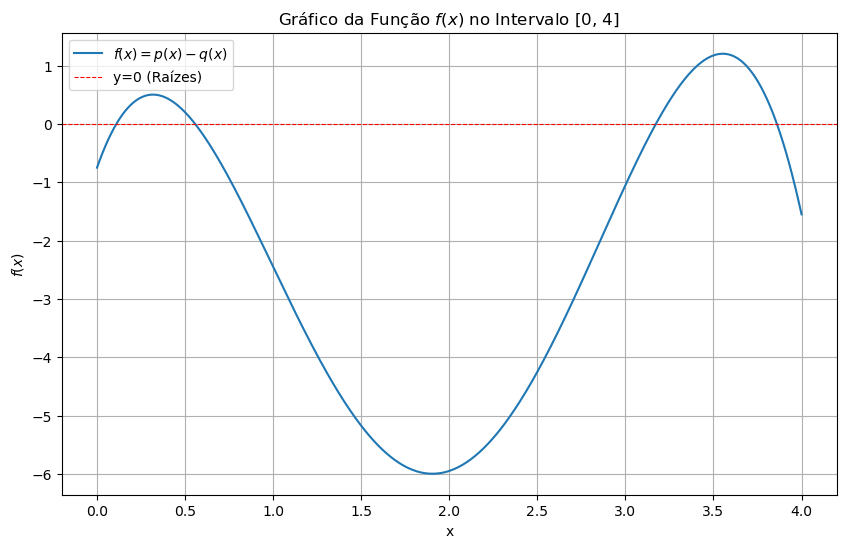

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Definição da função f(x) = p(x) - q(x) da Questão 2
f = lambda x: -x**4 + 7.7*x**3 - 17*x**2 + 8.6*x - 0.75

# Criação do intervalo de x de 0 a 4
x_vals = np.linspace(0, 4, 500)
y_vals = f(x_vals)

# Criação do gráfico
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='$f(x) = p(x) - q(x)$')
# Adiciona uma linha horizontal em y=0 para visualizar as raízes
plt.axhline(0, color='red', linestyle='--', linewidth=0.8, label='y=0 (Raízes)')
plt.title('Gráfico da Função $f(x)$ no Intervalo [0, 4]')
plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.grid(True)
plt.legend()

# Salva a figura
plt.savefig('grafico_fx.png')

Analisando o gráfico dado na questão, sabemos que o impacto de maior elevação acontece no intervalo $[2, 4]$, agora escolhemos um subintervalo olhando para o comportamento da f(x) pois precisamos garantir que nesse subintervalo $[a, b]$ ocorra $f(a)*f(b)<0$, escolheremos então [2.5, 3.5].

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Definição das funções
p = lambda x: -x**4 + 7.7*x**3 - 18*x**2 + 13.6*x
q = lambda x: -x**2 + 5*x + 0.75
f = lambda x: p(x) - q(x)

# --- Método da Bisseção ---
def bissecao(func, a, b, tol=0.001, max_iter=5):
    if func(a) * func(b) >= 0:
        print("O Teorema de Bolzano não garante a existência de raiz no intervalo.")
        return None
    
    iter_count = 0
    while (b - a) / 2.0 > tol and iter_count < max_iter:
        c = (a + b) / 2.0
        if func(c) == 0:
            break
        elif func(a) * func(c) < 0:
            b = c
        else:
            a = c
        iter_count += 1
        print(f"Iteração {iter_count}: Raiz aproximada = {c:.6f}")
        
    raiz = (a + b) / 2.0
    return raiz

# Execução da Bisseção 
print("--- Método da Bisseção ---")
# O gráfico sugere que a raiz da "maior elevação" está entre 3 e 4.
intervalo_a = 2.5
intervalo_b = 3.5
raiz_bissecao = bissecao(f, intervalo_a, intervalo_b, tol=0.001, max_iter=5)

if raiz_bissecao is not None:
    altura_impacto = q(raiz_bissecao)
    print(f"\nRaiz encontrada (x*): {raiz_bissecao:.6f}")
    print(f"Altura do impacto (p(x*)): {altura_impacto:.6f}")

--- Método da Bisseção ---
Iteração 1: Raiz aproximada = 3.000000
Iteração 2: Raiz aproximada = 3.250000
Iteração 3: Raiz aproximada = 3.125000
Iteração 4: Raiz aproximada = 3.187500
Iteração 5: Raiz aproximada = 3.156250

Raiz encontrada (x*): 3.171875
Altura do impacto (p(x*)): 6.548584


Utilizando uma função pronta da biblioteca numpy do python para comparar com o resultado que tivemos com o método da Bisseção.

In [12]:
import numpy as np

# Coeficientes do polinômio f(x) = -1*x^4 + 7.7*x^3 - 17*x^2 + 8.6*x - 0.75
# (da maior potência para a menor)
coeficientes = [-1, 7.7, -17, 8.6, -0.75]

# Encontra todas as raízes (reais e complexas)
raizes = np.roots(coeficientes)

print("Todas as raízes encontradas pela função np.roots():")
print(raizes)

# Filtra para mostrar apenas as raízes reais
raizes_reais = raizes[np.isreal(raizes)].real

print("\nApenas as raízes reais:")
print(raizes_reais)

Todas as raízes encontradas pela função np.roots():
[3.86007415 3.1729163  0.55708788 0.10992166]

Apenas as raízes reais:
[3.86007415 3.1729163  0.55708788 0.10992166]


Comparando os resultados, nota-se que a raíz encontrada pelo Método da Bisseção é bem próxima de uma das raízes dada por np.roots(), com diferença aproximada de 0.0011. Dada a limitação de 5 iterações, o resultado pode ser considerado bastante satisfatório.

#### b) Formulação como $ F:\mathbb{R}^2 \to \mathbb{R}^2 $

##### Como Funciona o Algoritmo de Newton para Sistemas

O Método de Newton para sistemas de equações não lineares é uma generalização do método para uma única variável. A ideia central é a mesma: em vez de tentar resolver o sistema não linear complexo de uma vez, nós o aproximamos por um **sistema linear** mais simples a cada iteração, e resolvemos esse sistema para encontrar uma aproximação cada vez melhor da raiz.

---

##### 1. A Linearização com a Matriz Jacobiana

Para uma única variável, usamos a reta tangente (a derivada) para linearizar a função. Para um sistema de múltiplas variáveis, como $F:\mathbb{R}^2 \to \mathbb{R}^2$, a generalização da derivada é a **Matriz Jacobiana** $J(\mathbf{X})$.

A Jacobiana é uma matriz que contém todas as derivadas parciais do sistema. Para o seu problema, ela é:
$$
J_F(x,y)
=
\begin{pmatrix}
\frac{\partial F_1}{\partial x} & \frac{\partial F_1}{\partial y} \\[6pt]
\frac{\partial F_2}{\partial x} & \frac{\partial F_2}{\partial y}
\end{pmatrix}
=
\begin{pmatrix}
p'(x) & -1 \\[4pt]
q'(x) & -1
\end{pmatrix}
$$
* **O que ela representa?** A Jacobiana $J(\mathbf{X})$ descreve como o sistema $F(\mathbf{X})$ se comporta na vizinhança de um ponto $\mathbf{X}$. Ela nos dá a "inclinação" multidimensional do sistema, que é a melhor aproximação linear (um plano tangente) para a função naquele ponto.
* **Jacobiana vs. Gradiente:** Enquanto o *vetor gradiente* ($\nabla f$) é a generalização da derivada para funções de várias variáveis com resultado escalar ($f: \mathbb{R}^n \to \mathbb{R}$), a *matriz Jacobiana* é a generalização para funções com resultado vetorial ($F: \mathbb{R}^n \to \mathbb{R}^m$). As linhas da Jacobiana são, na verdade, os gradientes de cada uma das funções componentes do sistema.

---

##### 2. O Passo a Passo do Algoritmo

O método gera uma sequência de vetores $\{\mathbf{X}_0, \mathbf{X}_1, \mathbf{X}_2, ...\}$ que, espera-se, convirja para a raiz $\boldsymbol{\alpha}$ onde $F(\boldsymbol{\alpha}) = \mathbf{0}$.

###### **Inicialização**

O algoritmo começa com um "chute inicial" $\mathbf{X}_0$.

```python
# Chute inicial perto da raiz esperada
X0 = np.array([2.5, q(2.5)])
# Inicia a sequência com esse chute
X = X0.copy()
```

###### **O Loop Iterativo (`for k in range(...)`)**

O núcleo do método é um loop que refina a aproximação a cada passo. O processo para quando um critério de parada é satisfeito. 

###### **O Coração do Método: Resolvendo o Sistema Linear**

Estas duas linhas são a parte mais importante:

```python
Fx = F(X)
Jx = J(X)
delta = np.linalg.solve(Jx, Fx)
```

1.  **Aproximação por Taylor:** O método de Newton lineariza a função $F$ em torno da aproximação atual $\mathbf{X}_k$. Usando a série de Taylor para funções vetoriais, queremos encontrar um pequeno passo $\mathbf{v}_k$ tal que o próximo ponto, $\boldsymbol{\alpha} = \mathbf{X}_k + \mathbf{v}_k$, seja a raiz. 
    $$
    \mathbf{0} = F(\boldsymbol{\alpha}) = F(\mathbf{X}_k + \mathbf{v}_k) \approx F(\mathbf{X}_k) + J(\mathbf{X}_k)\mathbf{v}_k
    $$
2.**O Sistema Linear:** Rearranjando a equação acima, obtemos um sistema de equações *lineares* para o passo de atualização $\mathbf{v}_k$: 
    $$
    J(\mathbf{X}_k)\mathbf{v}_k = -F(\mathbf{X}_k)
    $$
    Isso é exatamente o que a linha `np.linalg.solve(Jx, Fx)` faz, mas com uma pequena variação de sinal para conveniência. No seu código, $\mathbf{\delta}$ é calculado a partir de $J_k \cdot \mathbf{\delta} = F_k$. Portanto, $\mathbf{\delta} = J_k^{-1} F_k$.

###### **Atualizando a Solução**

Uma vez que o passo de correção (`delta`) é calculado, a nova aproximação $\mathbf{X}_{k+1}$ é encontrada:

```python
X_next = X - delta
```

Isso corresponde à fórmula de iteração do Método de Newton para sistemas:
$$\mathbf{X}_{k+1} = \mathbf{X}_k - J(\mathbf{X}_k)^{-1} F(\mathbf{X}_k)$$
onde o termo $J^{-1}F$ é o nosso `delta`.

##### **Critério de Parada**

O loop continua até que a mudança de uma iteração para a outra seja pequena o suficiente.

```python
if np.linalg.norm(X_next - X) < tol:
    # ... convergiu
```

Isso corresponde ao critério de parada por erro absoluto, mas aplicado à norma do vetor de atualização $\mathbf{\delta} = \mathbf{X}_{k+1} - \mathbf{X}_k$. Se a "distância" entre a aproximação atual e a próxima for menor que uma tolerância `tol`, consideramos que o método convergiu.

In [18]:
import numpy as np

# 1. Definição das funções e derivadas
def p(x):
    return -x**4 + 7.7*x**3 - 18*x**2 + 13.6*x

def q(x):
    return -x**2 + 5*x + 0.75

def dp(x):
    return -4*x**3 + 3*7.7*x**2 - 36*x + 13.6

def dq(x):
    return -2*x + 5

# 2. Sistema F : R² → R² e sua Jacobiana
def F(X):
    x, y = X
    return np.array([p(x) - y,
                     q(x) - y])

def J(X):
    x, y = X
    return np.array([[dp(x), -1],
                     [dq(x), -1]])

# 3. Método de Newton para sistemas
def newton_system(F, J, X0, tol=1e-3, max_iter=50):
    X = X0.copy()
    for k in range(1, max_iter+1):
        Fx = F(X)
        Jx = J(X)
        # resolve J(x_k) · delta = F(x_k)
        delta = np.linalg.solve(Jx, Fx)
        X_next = X - delta
        if np.linalg.norm(X_next - X) < tol:
            print(f"Convergiu em {k} iterações")
            return X_next
        X = X_next
    raise RuntimeError("Não convergiu em {max_iter} iterações")

# 4. Chute inicial e execução
X0 = np.array([2.5, q(2.5)])   # por exemplo, x=4, y=q(4)
root = newton_system(F, J, X0)

x_star, y_star = root
print(f"Raiz encontrada: x* = {x_star:.6f}, y* = {y_star:.6f}")


Convergiu em 4 iterações
Raiz encontrada: x* = 3.172916, y* = 6.547184


### 3 Decomposição em Valores Singulares (SVD) e o Método de Francis

A **Decomposição em Valores Singulares**, ou **SVD**, é uma das mais importantes e úteis fatorações de matrizes da álgebra linear. Ela afirma que qualquer matriz $A$ de tamanho $m \times n$ pode ser decomposta no produto de três outras matrizes com propriedades especiais:
$$
A = U \Sigma V^T
$$
Onde:
-   **$U$** é uma matriz ortogonal $m \times n$ cujas colunas são os **vetores singulares à esquerda**. 
-   **$\Sigma$** (Sigma) é uma matriz diagonal $m \times n$ que contém os **valores singulares** ($\sigma_1, \sigma_2, ...$) em sua diagonal. Esses valores são sempre reais e não negativos, e por convenção, são ordenados do maior para o menor. 
-   **$V^T$** é a transposta de uma matriz ortogonal $n \times n$ **$V$**, cujas colunas são os **vetores singulares à direita**. 

A SVD é poderosa porque revela a estrutura geométrica fundamental de uma matriz e tem aplicações vastas, como na compressão de dados e imagens. A ideia da compressão é que os primeiros valores singulares (os maiores) capturam a maior parte da "informação" ou "energia" da matriz. Ao descartar os valores singulares menores, podemos criar uma aproximação de baixo ranque da matriz original que ocupa muito menos espaço.

---

#### O Método de Francis (Iteração QR)

Para calcular a SVD, precisamos encontrar os autovalores e autovetores de matrizes associadas a $A$ (especificamente $A^TA$ ou $AA^T$). O **Método de Francis**, também conhecido como **Iteração QR**, é um algoritmo iterativo robusto para encontrar todos os autovalores de uma matriz.

O processo funciona da seguinte maneira:
1.  Comece com a matriz da qual você quer os autovalores, digamos $B_1 = B$.
2.  Em um loop, para $k=1, 2, ...$:
    a.  Realize a **Decomposição QR** na matriz atual: $B_k = Q_k R_k$.
    b.  Calcule a próxima matriz na sequência multiplicando os fatores na ordem inversa: $B_{k+1} = R_k Q_k$.
3.  Repita o passo 2 até a convergência. A sequência de matrizes $B_k$ converge para uma matriz triangular (ou diagonal, se $B$ for simétrica), cujos elementos da diagonal são os autovalores de $B$.

---

#### A Decomposição QR

A **Decomposição QR** é o pilar do Método de Francis. Ela fatora qualquer matriz $M$ em um produto de uma matriz ortogonal $Q$ e uma matriz triangular superior $R$ ($M = QR$).
-   Uma matriz **ortogonal** ($Q$) tem a propriedade de que sua transposta é sua inversa ($Q^T Q = I$), o que significa que ela preserva comprimentos e ângulos.
-   Uma matriz **triangular superior** ($R$) tem todos os seus elementos abaixo da diagonal principal iguais a zero.

Em cada passo da iteração QR, essa decomposição é calculada.

---

a) implementação do método de francis.

In [ ]:
import numpy as np

# Implementação do Método de Francis
def francis_qr_iteration(B, max_iter=1000, tol=1e-6):
    
    # Encontra os autovalores e autovetores de uma matriz B simétrica
    # usando o método de iteração QR (Francis).
    
    Bk = B.copy()
    n = B.shape[0]
    V = np.eye(n) # Matriz para acumular os autovetores

    for k in range(max_iter):
        # Decomposição QR do B atual
        Q, R = np.linalg.qr(Bk)
        Bk = R @ Q # Próxima iteração calcula-se Bk+1 com Bk+1 = Rk & Qk
            
        V = V @ Q # Acumula as transformações ortogonais
        
        # Critério de parada: verificar se a parte fora da diagonal é pequena max(i<j) {bij} < tol          
        off_diag = np.sum(np.abs(Bk - np.diag(np.diag(Bk))))
        if off_diag < tol:
            break
            
    autovalores = np.diag(Bk)
    autovetores = V
    return autovalores, autovetores